In [1]:
import csv
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
raw = pd.read_csv("1429_1.csv")

C:\Users\Vinot\AppData\Local\Temp\ipykernel_7300\1528679751.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  raw = pd.read_csv("1429_1.csv")


In [3]:
raw.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [4]:
textdata = raw[['categories','name','reviews.text','reviews.rating','reviews.title']]
textdata.shape

(34660, 5)

In [5]:
textdata= textdata.dropna()

In [6]:
textdata

,categories,name,reviews.text,reviews.rating,reviews.title
0,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,5.0,Kindle
1,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,5.0,very fast
2,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,5.0,Beginner tablet for our 9 year old son.
3,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,4.0,Good!!!
4,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,5.0,Fantastic Tablet for kids
...,...,...,...,...,...
27895,"Stereos,Remote Controls,Amazon Echo,Audio Dock...",New Amazon Kindle Fire Hd 9w Powerfast Adapter...,This is my new favorite device. While not perf...,5.0,My new favorite product
27896,"Stereos,Remote Controls,Amazon Echo,Audio Dock...",New Amazon Kindle Fire Hd 9w Powerfast Adapter...,I got this to basically experiment with. Strai...,5.0,Lots of potential!!!
27897,"Stereos,Remote Controls,Amazon Echo,Audio Dock...",New Amazon Kindle Fire Hd 9w Powerfast Adapter...,Good product that does the basics. Too bad you...,4.0,Good First Generation Product
27898,"Stereos,Remote Controls,Amazon Echo,Audio Dock...",New Amazon Kindle Fire Hd 9w Powerfast Adapter...,This is great for a connected home. People who...,3.0,"Great for a ""connected home"""


In [7]:
stop=stopwords.words('english')

In [8]:
#removing stop words

textdata['review_body']=textdata["reviews.text"].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))

In [9]:
textdata.head()

,categories,name,reviews.text,reviews.rating,reviews.title,review_body
0,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,5.0,Kindle,This product far disappointed. My children lov...
1,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,5.0,very fast,great beginner experienced person. Bought gift...
2,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,5.0,Beginner tablet for our 9 year old son.,"Inexpensive tablet use learn on, step NABI. He..."
3,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,4.0,Good!!!,I've Fire HD 8 two weeks I love it. This table...
4,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,5.0,Fantastic Tablet for kids,I bought grand daughter comes visit. I set use...


In [10]:
textdata['star_rating']=textdata['reviews.rating'].astype(float).astype(int)

In [11]:
textdata.head()

,categories,name,reviews.text,reviews.rating,reviews.title,review_body,star_rating
0,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,5.0,Kindle,This product far disappointed. My children lov...,5
1,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,5.0,very fast,great beginner experienced person. Bought gift...,5
2,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,5.0,Beginner tablet for our 9 year old son.,"Inexpensive tablet use learn on, step NABI. He...",5
3,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,4.0,Good!!!,I've Fire HD 8 two weeks I love it. This table...,4
4,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,5.0,Fantastic Tablet for kids,I bought grand daughter comes visit. I set use...,5


In [12]:
textdata['review_body']= textdata['review_body'].str.replace('<br />', r'')

In [13]:
textdata['review_body'] = textdata['review_body'].str.replace("[,'!;.–`:?><-]",'')

C:\Users\Vinot\AppData\Local\Temp\ipykernel_7300\1051208827.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  textdata['review_body'] = textdata['review_body'].str.replace("[,'!;.–`:?><-]",'')


In [14]:
textdata['review_body'] = textdata['review_body'].str.lower()

In [15]:
textdata['review_body'] =textdata.review_body.str.replace('[^a-zA-Z ]', '') 

C:\Users\Vinot\AppData\Local\Temp\ipykernel_7300\4101880381.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  textdata['review_body'] =textdata.review_body.str.replace('[^a-zA-Z ]', '')


In [16]:
textdata.isna().sum()

categories        0
name              0
reviews.text      0
reviews.rating    0
reviews.title     0
review_body       0
star_rating       0
dtype: int64

In [17]:
def partition(x):
    if x<3:
        return 'Negative'
    elif x>3:
        return 'Positive'
    return 'Neutral'

actualScore = textdata['star_rating']
positiveNegative = actualScore.map(partition)
textdata['star_rating'] = positiveNegative

In [18]:
textdata.head()

,categories,name,reviews.text,reviews.rating,reviews.title,review_body,star_rating
0,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,5.0,Kindle,this product far disappointed my children love...,Positive
1,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,5.0,very fast,great beginner experienced person bought gift ...,Positive
2,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,5.0,Beginner tablet for our 9 year old son.,inexpensive tablet use learn on step nabi he t...,Positive
3,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,4.0,Good!!!,ive fire hd two weeks i love it this tablet g...,Positive
4,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,5.0,Fantastic Tablet for kids,i bought grand daughter comes visit i set user...,Positive


In [19]:
x_train, x_test, y_train, y_test = train_test_split(textdata.review_body, textdata.star_rating, random_state=0,test_size=0.2)

In [22]:
print(x_test)

14744    too slow games videos bought youngest son woul...
12709    great tablet facebook email games surfing inte...
16903    i want buy  year old something really expensiv...
20264    works expected without glitchesvery happy purc...
12059    the fire tablet works great everything ipad co...
                               ...                        
21163    lightweight easy eyes easy use many wonderful ...
7511     great tabletjust needs way disable ads stuff l...
2308     i recommend tablet  i like lot  perfect size p...
21945      i received gift loved much i bought one husband
25650        amazon account dependent speaker decent sound
Name: review_body, Length: 5573, dtype: object


In [20]:

clf = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', LogisticRegression()),
])
clf = clf.fit(x_train, y_train)
accuracy_train=accuracy_score(y_train, clf.predict(x_train))
accuracy_test=accuracy_score(y_test, clf.predict(x_test))
print('Accuracy on train %f' %accuracy_train)
print('Accuracy on test %f' %accuracy_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on train 0.971109
Accuracy on test 0.931455


In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [22]:
log_cfm = confusion_matrix(y_test, clf.predict(x_test))
print("Confusion matrix:")
print(log_cfm, end='\n\n')
print('-'*15)
print(np.array([['TN', 'FP'],[ 'FN' , 'TP']]))

Confusion matrix:
[[  35   19   65]
 [  14   36  189]
 [  22   73 5120]]

---------------
[['TN' 'FP']
 ['FN' 'TP']]


In [23]:
from sklearn.metrics import precision_recall_fscore_support as score

predicted = clf.predict(x_test)
y_test 

precision, recall, fscore, support = score(y_test, predicted,average='weighted')

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: 0.9141209033559352
recall: 0.9314552305759913
fscore: 0.9212005396980426
support: None


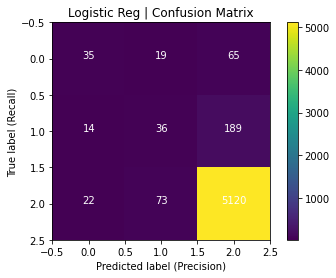

In [24]:
plt.imshow(log_cfm, interpolation='nearest')

for i, j in itertools.product(range(log_cfm.shape[0]), range(log_cfm.shape[1])):
    plt.text(j, i, log_cfm[i, j],
             horizontalalignment="center",
             color="white")

plt.ylabel('True label (Recall)')
plt.xlabel('Predicted label (Precision)')
plt.title('Logistic Reg | Confusion Matrix')
plt.colorbar();

In [25]:
clf = Pipeline([
    ('vect', CountVectorizer(analyzer='word', ngram_range=(1, 2))),
    ('clf', LogisticRegression(max_iter=500,C=0.1,random_state=40,solver='newton-cg')),
])
clf = clf.fit(x_train, y_train)
accuracy_train=accuracy_score(y_train, clf.predict(x_train))
accuracy_test=accuracy_score(y_test, clf.predict(x_test))
print('Accuracy on train %f' %accuracy_train)
print('Accuracy on test %f' %accuracy_test)

Accuracy on train 0.964425
Accuracy on test 0.938094


In [26]:
log_cfm = confusion_matrix(y_test, clf.predict(x_test))
print("Confusion matrix:")
print(log_cfm, end='\n\n')
print('-'*15)
print(np.array([['TN', 'FP'],[ 'FN' , 'TP']]))

Confusion matrix:
[[  20   11   88]
 [   5   13  221]
 [   5   15 5195]]

---------------
[['TN' 'FP']
 ['FN' 'TP']]


In [27]:
from sklearn.metrics import precision_recall_fscore_support as score

predicted = clf.predict(x_test)
y_test 

precision, recall, fscore, support = score(y_test, predicted,average='weighted')

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: 0.9117575355534784
recall: 0.9380943836353849
fscore: 0.9167834180105074
support: None


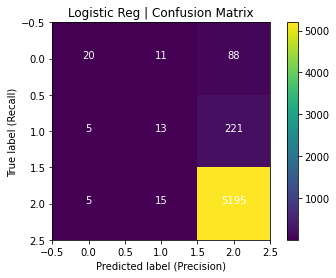

In [28]:
plt.imshow(log_cfm, interpolation='nearest')

for i, j in itertools.product(range(log_cfm.shape[0]), range(log_cfm.shape[1])):
    plt.text(j, i, log_cfm[i, j],
             horizontalalignment="center",
             color="white")

plt.ylabel('True label (Recall)')
plt.xlabel('Predicted label (Precision)')
plt.title('Logistic Reg | Confusion Matrix')
plt.colorbar();

In [29]:
from sklearn.ensemble import RandomForestClassifier
clf = Pipeline([
    ('vect', CountVectorizer(analyzer='word', ngram_range=(1, 2))),
    ('clf', RandomForestClassifier()),
])
clf = clf.fit(x_train, y_train)
accuracy_train=accuracy_score(y_train, clf.predict(x_train))
accuracy_test=accuracy_score(y_test, clf.predict(x_test))
print('Accuracy on train %f' %accuracy_train)
print('Accuracy on test %f' %accuracy_test)

Accuracy on train 1.000000
Accuracy on test 0.936659


In [30]:
from sklearn.metrics import precision_recall_fscore_support as score

predicted = clf.predict(x_test)
y_test 

precision, recall, fscore, support = score(y_test, predicted,average='weighted')

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: 0.926683797780629
recall: 0.9366588910820025
fscore: 0.9073124442211483
support: None


In [31]:
from sklearn.naive_bayes import MultinomialNB
clf = Pipeline([
    ('vect',TfidfVectorizer()),
    ('clf',MultinomialNB()),
])
clf = clf.fit(x_train, y_train)
accuracy_train=accuracy_score(y_train, clf.predict(x_train))
accuracy_test=accuracy_score(y_test, clf.predict(x_test))
print('Accuracy on train %f' %accuracy_train)
print('Accuracy on test %f' %accuracy_test)

Accuracy on train 0.928312
Accuracy on test 0.935762


In [32]:
from sklearn.metrics import precision_recall_fscore_support as score

predicted = clf.predict(x_test)
y_test 

precision, recall, fscore, support = score(y_test, predicted,average='weighted')

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: 0.8756499746010161
recall: 0.9357617082361386
fscore: 0.9047084368653064
support: None


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
from sklearn.naive_bayes import MultinomialNB
clf = Pipeline([
    ('vect', CountVectorizer(analyzer='word', ngram_range=(1, 2))),
    ('clf',MultinomialNB()),
])
clf = clf.fit(x_train, y_train)
accuracy_train=accuracy_score(y_train, clf.predict(x_train))
accuracy_test=accuracy_score(y_test, clf.predict(x_test))
print('Accuracy on train %f' %accuracy_train)
print('Accuracy on test %f' %accuracy_test)

Accuracy on train 0.955991
Accuracy on test 0.936300


In [44]:
from sklearn.metrics import precision_recall_fscore_support as score

predicted = clf.predict(x_test)
y_test 

precision, recall, fscore, support = score(y_test, predicted,average='weighted')

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: 0.9403598911267811
recall: 0.9363000179436569
fscore: 0.9060277666935488
support: None


In [33]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [45]:
import xgboost as xgb
clf = Pipeline([
    ('vect',TfidfVectorizer()),
    ('clf',xgb_classifier),
])
clf = clf.fit(x_train, y_train)
accuracy_train=accuracy_score(y_train, clf.predict(x_train))
accuracy_test=accuracy_score(y_test, clf.predict(x_test))
print('Accuracy on train %f' %accuracy_train)
print('Accuracy on test %f' %accuracy_test)

C:\ProgramData\Anaconda3\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:57:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy on train 0.960926
Accuracy on test 0.937915


C:\ProgramData\Anaconda3\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


In [46]:
from sklearn.metrics import precision_recall_fscore_support as score

predicted = clf.predict(x_test)
y_test 

precision, recall, fscore, support = score(y_test, predicted,average='weighted')

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: 0.910363006210735
recall: 0.9379149470662121
fscore: 0.91728277842563
support: None


C:\ProgramData\Anaconda3\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


In [26]:
import xgboost as xgb
clf = Pipeline([
    ('vect',CountVectorizer()),
    ('clf',xgb_classifier),
])
clf = clf.fit(x_train, y_train)
accuracy_train=accuracy_score(y_train, clf.predict(x_train))
accuracy_test=accuracy_score(y_test, clf.predict(x_test))
print('Accuracy on train %f' %accuracy_train)
print('Accuracy on test %f' %accuracy_test)

C:\ProgramData\Anaconda3\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:15:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy on train 0.960926
Accuracy on test 0.937915


C:\ProgramData\Anaconda3\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


In [36]:
from sklearn.metrics import precision_recall_fscore_support as score

predicted = clf.predict(x_test)
y_test 

precision, recall, fscore, support = score(y_test, predicted,average='weighted')

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: 0.910363006210735
recall: 0.9379149470662121
fscore: 0.91728277842563
support: None


C:\ProgramData\Anaconda3\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


In [37]:
clf = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', LogisticRegression()),
])
clf = clf.fit(x_train, y_train)
accuracy_train=accuracy_score(y_train, clf.predict(x_train))
accuracy_test=accuracy_score(y_test, clf.predict(x_test))
print('Accuracy on train %f' %accuracy_train)
print('Accuracy on test %f' %accuracy_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on train 0.938406
Accuracy on test 0.937556


In [38]:
from sklearn.metrics import precision_recall_fscore_support as score

predicted = clf.predict(x_test)
y_test 

precision, recall, fscore, support = score(y_test, predicted,average='weighted')

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: 0.9089136462857977
recall: 0.9375560739278666
fscore: 0.9148875593573241
support: None


In [39]:
clf = Pipeline([
    ('vect', TfidfVectorizer(analyzer='word', ngram_range=(1, 2))),
    ('clf', LogisticRegression(max_iter=500,C=0.1,random_state=40,solver='newton-cg')),
])
clf = clf.fit(x_train, y_train)
accuracy_train=accuracy_score(y_train, clf.predict(x_train))
accuracy_test=accuracy_score(y_test, clf.predict(x_test))
print('Accuracy on train %f' %accuracy_train)
print('Accuracy on test %f' %accuracy_test)

Accuracy on train 0.928402
Accuracy on test 0.935762


In [40]:
from sklearn.metrics import precision_recall_fscore_support as score

predicted = clf.predict(x_test)
y_test 

precision, recall, fscore, support = score(y_test, predicted,average='weighted')

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: 0.8756499746010161
recall: 0.9357617082361386
fscore: 0.9047084368653064
support: None


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
from sklearn.ensemble import RandomForestClassifier
clf = Pipeline([
    ('vect',  TfidfVectorizer(analyzer='word', ngram_range=(1, 2))),
    ('clf', RandomForestClassifier()),
])
clf = clf.fit(x_train, y_train)
accuracy_train=accuracy_score(y_train, clf.predict(x_train))
accuracy_test=accuracy_score(y_test, clf.predict(x_test))
print('Accuracy on train %f' %accuracy_train)
print('Accuracy on test %f' %accuracy_test)

Accuracy on train 0.999955
Accuracy on test 0.936479


In [42]:
from sklearn.metrics import precision_recall_fscore_support as score

predicted = clf.predict(x_test)
y_test 

precision, recall, fscore, support = score(y_test, predicted,average='weighted')

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: 0.9195362411085793
recall: 0.9364794545128298
fscore: 0.9069623598127213
support: None


In [47]:
model=MultinomialNB()
param={'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}

In [53]:
from sklearn.model_selection import GridSearchCV

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

In [61]:
# Vectorize X_train
vectorizer = TfidfVectorizer(min_df=5).fit(x_train)
X_train = vectorizer.transform(x_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<22291x3542 sparse matrix of type '<class 'numpy.float64'>'
	with 325726 stored elements in Compressed Sparse Row format>


In [62]:
grid = GridSearchCV(model, param, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.1, 1, 10, 100,
                                   1000]})

In [63]:
print("Best cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.929
Best parameters:  {'alpha': 0.1}


In [65]:
X_test = vectorizer.transform(x_test)

In [66]:
print("{:.3f}".format(grid.score(X_test, y_test)))

0.938


In [54]:
clf=GridSearchCV(model,param,scoring='roc_auc',cv=10,return_train_score=True)

In [69]:
from sklearn.naive_bayes import MultinomialNB
clf = Pipeline([
    ('vect', TfidfVectorizer(analyzer='word', ngram_range=(1, 2))),
    ('clf',MultinomialNB()),
])
clf = clf.fit(x_train, y_train)
accuracy_train=accuracy_score(y_train, clf.predict(x_train))
accuracy_test=accuracy_score(y_test, clf.predict(x_test))
print('Accuracy on train %f' %accuracy_train)
print('Accuracy on test %f' %accuracy_test)

Accuracy on train 0.928402
Accuracy on test 0.935762


In [68]:
from sklearn.metrics import precision_recall_fscore_support as score

predicted = clf.predict(x_test)
y_test 

precision, recall, fscore, support = score(y_test, predicted,average='weighted')

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: 0.9403598911267811
recall: 0.9363000179436569
fscore: 0.9060277666935488
support: None
